# Team Members Group 3

## Varit Rungbanapan 6288039 Section 3
## Waipop Permpornskul 6288104 Section 3
## Rungrawee Akkarapattanakoon 6288115 Section 3

# Import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 0. Load Dataset

In [2]:
df = pd.read_csv("covid.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167931,ZWE,Africa,Zimbabwe,2022-03-08,240343.0,633.0,496.000,5400.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167932,ZWE,Africa,Zimbabwe,2022-03-09,240343.0,0.0,405.714,5400.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167933,ZWE,Africa,Zimbabwe,2022-03-10,241548.0,1205.0,577.857,5408.0,8.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167934,ZWE,Africa,Zimbabwe,2022-03-11,241548.0,0.0,401.286,5408.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# 1. Prepare the Data

**Display all columns**

To find unnecessary columns

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

**Drop unnecessary columns**

For smoothed, per_million, per_thousand, and per_hundred columns, we decide to remove them because they are ratio data that we can create later on from raw data. For location, we remove it because it is redundant with iso_code. For aged_70_older, we decide to remove it and keep age_65_older because it is also redundant. And for life_expectancy, we remove it because it it data from 2019.

In [5]:
clean_df = df
clean_df = clean_df.drop(columns = ['location', 'new_cases_smoothed', 'new_deaths_smoothed',
                                    'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                                    'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                                    'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions_per_million',
                                    'weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                                    'new_tests_smoothed_per_thousand','new_vaccinations_smoothed','total_vaccinations_per_hundred',
                                    'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred',
                                    'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
                                    'aged_70_older','life_expectancy','new_tests_smoothed','excess_mortality_cumulative_per_million'
                                    ])

**Change tests_units from "tests performed" or null to 1 as "tests performed" and 0 as null.**

To remove string data, we will use 1 for perforiming test and 0 as not perform.

In [6]:
clean_df['tests_units'] = clean_df['tests_units'].notnull().astype("int")

**Find the number of missing values for each column**

To find a way to deal with null values

In [7]:
df.isnull().sum()

iso_code                                        0
continent                                   10047
location                                        0
date                                            0
total_cases                                  3047
                                            ...  
human_development_index                     30360
excess_mortality_cumulative_absolute       162189
excess_mortality_cumulative                162189
excess_mortality                           162189
excess_mortality_cumulative_per_million    162189
Length: 67, dtype: int64

**Fill null value with 0**

The reason why we fill the null value of these columns with 0 is that they are data that represent a countable number, if the value is null, it means that there is no value. For example, if the new_deaths column is null, it means that there is no death this day.

In [8]:
clean_df['total_cases'] = clean_df['total_cases'].fillna(0)
clean_df['new_cases'] = clean_df['new_cases'].fillna(0)
clean_df['total_deaths'] = clean_df['total_deaths'].fillna(0)
clean_df['new_deaths'] = clean_df['new_deaths'].fillna(0)
clean_df['icu_patients'] = clean_df['icu_patients'].fillna(0)
clean_df['hosp_patients'] = clean_df['hosp_patients'].fillna(0)
clean_df['weekly_icu_admissions'] = clean_df['weekly_icu_admissions'].fillna(0)
clean_df['weekly_hosp_admissions'] = clean_df['weekly_hosp_admissions'].fillna(0)
clean_df['new_tests'] = clean_df['new_tests'].fillna(0)
clean_df['total_tests'] = clean_df['total_tests'].fillna(0)
clean_df['total_vaccinations'] = clean_df['total_vaccinations'].fillna(0)
clean_df['people_vaccinated'] = clean_df['people_vaccinated'].fillna(0)
clean_df['people_fully_vaccinated'] = clean_df['people_fully_vaccinated'].fillna(0)
clean_df['total_boosters'] = clean_df['total_boosters'].fillna(0)
clean_df['new_vaccinations'] = clean_df['new_vaccinations'].fillna(0)
clean_df['population'] = clean_df['population'].fillna(0)
clean_df['population_density'] = clean_df['population_density'].fillna(0)
clean_df['median_age'] = clean_df['median_age'].fillna(0)
clean_df['aged_65_older'] = clean_df['aged_65_older'].fillna(0)
clean_df['gdp_per_capita'] = clean_df['gdp_per_capita'].fillna(0)
clean_df['cardiovasc_death_rate'] = clean_df['cardiovasc_death_rate'].fillna(0)
clean_df['diabetes_prevalence'] = clean_df['diabetes_prevalence'].fillna(0)
clean_df['extreme_poverty'] = clean_df['extreme_poverty'].fillna(0)
clean_df['female_smokers'] = clean_df['female_smokers'].fillna(0)
clean_df['male_smokers'] = clean_df['male_smokers'].fillna(0)
clean_df['handwashing_facilities'] = clean_df['handwashing_facilities'].fillna(0)
clean_df['hospital_beds_per_thousand'] = clean_df['hospital_beds_per_thousand'].fillna(0)
clean_df['human_development_index'] = clean_df['human_development_index'].fillna(0)

**Fill null value with mean values**

These columns are data that can fill null values with mean values without any problem.

In [9]:
clean_df['reproduction_rate'].fillna(clean_df.reproduction_rate.mean(),inplace=True)
clean_df['positive_rate'].fillna(clean_df.positive_rate.mean(),inplace=True)
clean_df['tests_per_case'].fillna(clean_df.tests_per_case.mean(),inplace=True)
clean_df['stringency_index'].fillna(clean_df.stringency_index.mean(),inplace=True)
clean_df['excess_mortality_cumulative_absolute'].fillna(clean_df.excess_mortality_cumulative_absolute.mean(),inplace=True)
clean_df['excess_mortality_cumulative'].fillna(clean_df.excess_mortality_cumulative.mean(),inplace=True)
clean_df['excess_mortality'].fillna(clean_df.excess_mortality.mean(),inplace=True)

Drop the null row in continent column 

In [10]:
clean_df = clean_df.dropna(subset=['continent'])

**Find remaining null value**

We can see that there is no null value left.

In [11]:
clean_df.isnull().sum()

iso_code                                0
continent                               0
date                                    0
total_cases                             0
new_cases                               0
total_deaths                            0
new_deaths                              0
reproduction_rate                       0
icu_patients                            0
hosp_patients                           0
weekly_icu_admissions                   0
weekly_hosp_admissions                  0
total_tests                             0
new_tests                               0
positive_rate                           0
tests_per_case                          0
tests_units                             0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                 0
total_boosters                          0
new_vaccinations                        0
stringency_index                        0
population                        

Change the date type from object to date_time

In [12]:
clean_df['date'] = pd.to_datetime(clean_df['date'])

Create the new column to store the month in each row of the dataframe

In [13]:
#Declare the month in each row in the dataframe 
clean_df["month"] = clean_df["date"].dt.month

Create the new column to store the month in each row of the dataframe

In [14]:
#Declare the year in each row in dataframe
clean_df["year"] = clean_df["date"].dt.year

Create the new dataframe for 2020 data only

In [15]:
#Choose the data in 2020 only
twozero = clean_df.drop(clean_df[(clean_df.year != 2020)].index)

Create the new dataframe for 2021 data only

In [16]:

#Choose the data in 2021 only
twoone = clean_df.drop(clean_df[(clean_df.year != 2021)].index)

Create the new dataframe for 2022 data only

In [17]:
#Choose the data in 2022 only
twotwo = clean_df.drop(clean_df[(clean_df.year != 2022)].index)

**Check types of all columns**

To find out if all types of data are already appropriate

In [18]:
clean_df.dtypes

iso_code                                        object
continent                                       object
date                                    datetime64[ns]
total_cases                                    float64
new_cases                                      float64
total_deaths                                   float64
new_deaths                                     float64
reproduction_rate                              float64
icu_patients                                   float64
hosp_patients                                  float64
weekly_icu_admissions                          float64
weekly_hosp_admissions                         float64
total_tests                                    float64
new_tests                                      float64
positive_rate                                  float64
tests_per_case                                 float64
tests_units                                      int64
total_vaccinations                             float64
people_vac

# 2. Show the Insigns

In [19]:
clean_df.head(10)

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,month,year
0,AFG,Asia,2020-02-24,5.0,5.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
1,AFG,Asia,2020-02-25,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
2,AFG,Asia,2020-02-26,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
3,AFG,Asia,2020-02-27,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
4,AFG,Asia,2020-02-28,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
5,AFG,Asia,2020-02-29,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,2,2020
6,AFG,Asia,2020-03-01,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,3,2020
7,AFG,Asia,2020-03-02,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,3,2020
8,AFG,Asia,2020-03-03,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,3,2020
9,AFG,Asia,2020-03-04,5.0,0.0,0.0,0.0,0.998239,0.0,0.0,...,0.0,0.0,37.746,0.5,0.511,38223.008596,9.478975,15.992426,3,2020


In [20]:
lb_make = LabelEncoder()
clean_df['continent_code'] = lb_make.fit_transform(clean_df['continent'].astype(str))
clean_df.groupby('continent').agg('sum')

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,total_tests,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,month,year,continent_code
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3.287154e+09,11411146.0,81140327.0,250602.0,36308.445472,16097.0,0.0,0.0,458895.0,1.803889e+10,...,718413.1,810456.676,43879.000,21630.700,1.528867e+09,377169.389278,636884.790673,260316,80427925,0
Asia,2.917672e+10,125371613.0,420995635.0,1369914.0,37183.452962,656054.0,4569515.0,50928.0,4771328.0,4.124842e+11,...,1132286.5,1343206.408,95204.390,25689.853,1.382713e+09,345660.855325,583976.717806,233726,73827556,36536
Europe,2.967867e+10,165822822.0,574895885.0,1740040.0,39688.033440,8589475.0,61318584.0,2161905.0,26705276.0,4.536521e+11,...,1067037.3,208534.971,166445.375,27753.963,1.367494e+09,343702.596014,587941.211404,240541,75664640,74890
North America,2.377176e+10,93775280.0,494704241.0,1391186.0,24830.294341,9181837.0,37515498.0,0.0,33105150.0,2.803815e+11,...,199153.8,743608.784,39156.340,12830.614,1.023430e+09,239169.391242,403526.403155,164066,50858969,75507
Oceania,2.548732e+08,4240741.0,1346052.0,8261.0,9362.621422,53333.0,434193.0,0.0,0.0,1.663772e+10,...,170215.5,72190.624,12602.620,4539.034,3.467869e+08,85224.794594,144987.880656,61750,18852892,37316
South America,1.582430e+10,55009840.0,475928824.0,1255547.0,10156.204105,2832366.0,321736.0,372086.0,1326162.0,5.128188e+10,...,147427.1,291002.200,18602.760,6799.542,3.857019e+08,105698.875867,167711.083974,62181,19414751,48040


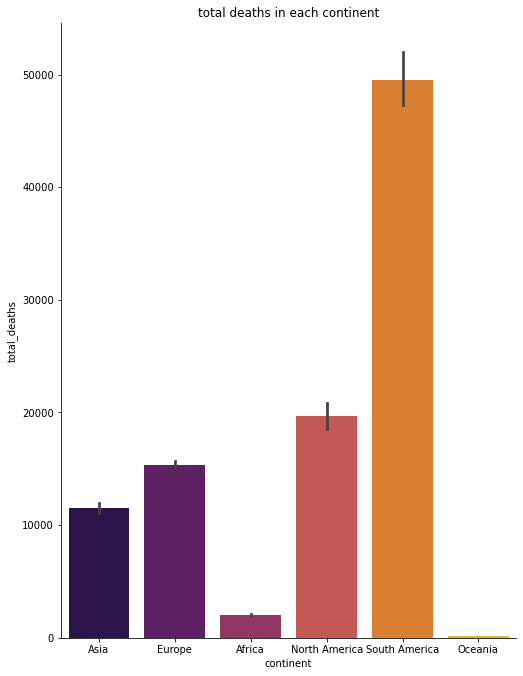

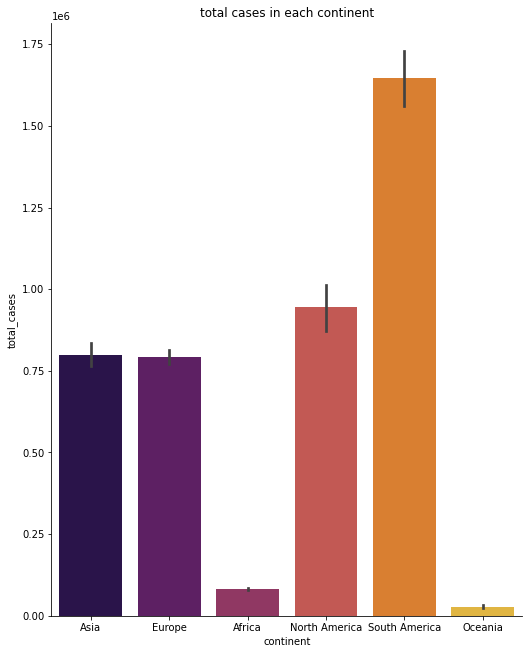

In [21]:
sns.catplot(x='continent', 
            y='total_deaths', kind='bar', palette="inferno", 
            data=clean_df)
plt.title('total deaths in each continent')
plt.gcf().set_size_inches(8, 10)


sns.catplot(x='continent', 
             y='total_cases', kind='bar', palette="inferno", 
             data=clean_df)
plt.title('total cases in each continent')
plt.gcf().set_size_inches(8, 10)

As you can see from the graph above, Europe, North America and South America have higher death rate compare with Asia in term of comparison with number of total cases.

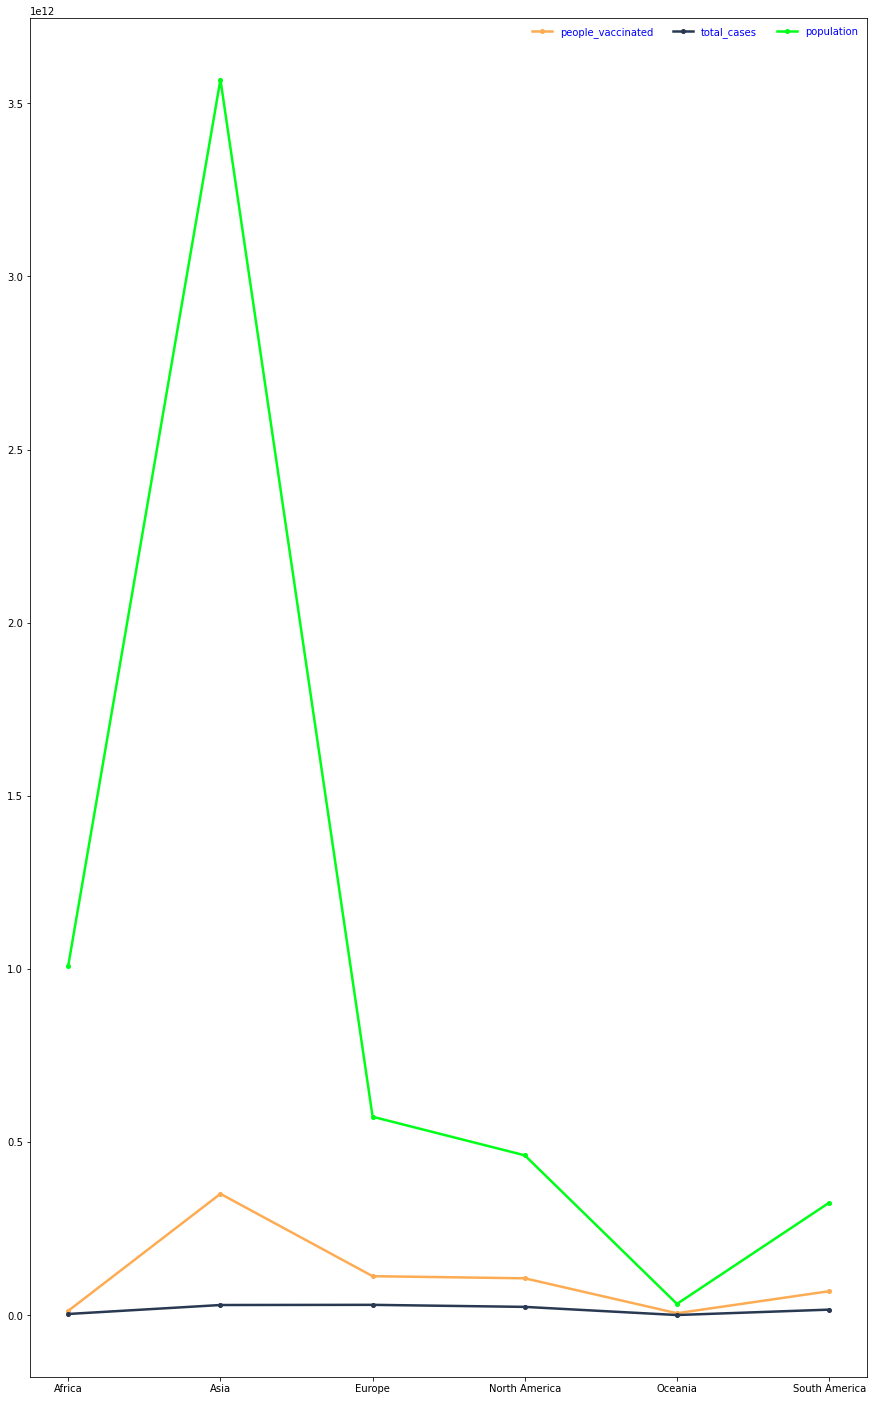

In [22]:
plt.subplots(figsize=(15, 25))

plt.plot(clean_df.groupby('continent').agg('sum')['people_vaccinated'], marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
plt.plot(clean_df.groupby('continent').agg('sum')['total_cases'], marker='o', markersize=4, color='#293952', linewidth=2.5)
plt.plot(clean_df.groupby('continent').agg('sum')['population'], marker='o', markersize=4, color='#00FE19', linewidth=2.5)

legend = plt.legend(['people_vaccinated','total_cases','population'], frameon=False, ncol=3)
plt.setp(legend.get_texts(), color='b')
plt.show()

The number of people vaccinated are directly proportional to total cases.

/var/folders/8t/9tlxrvy93n51j2xplzr917kh0000gn/T/ipykernel_2017/1257850694.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True),


<AxesSubplot:>

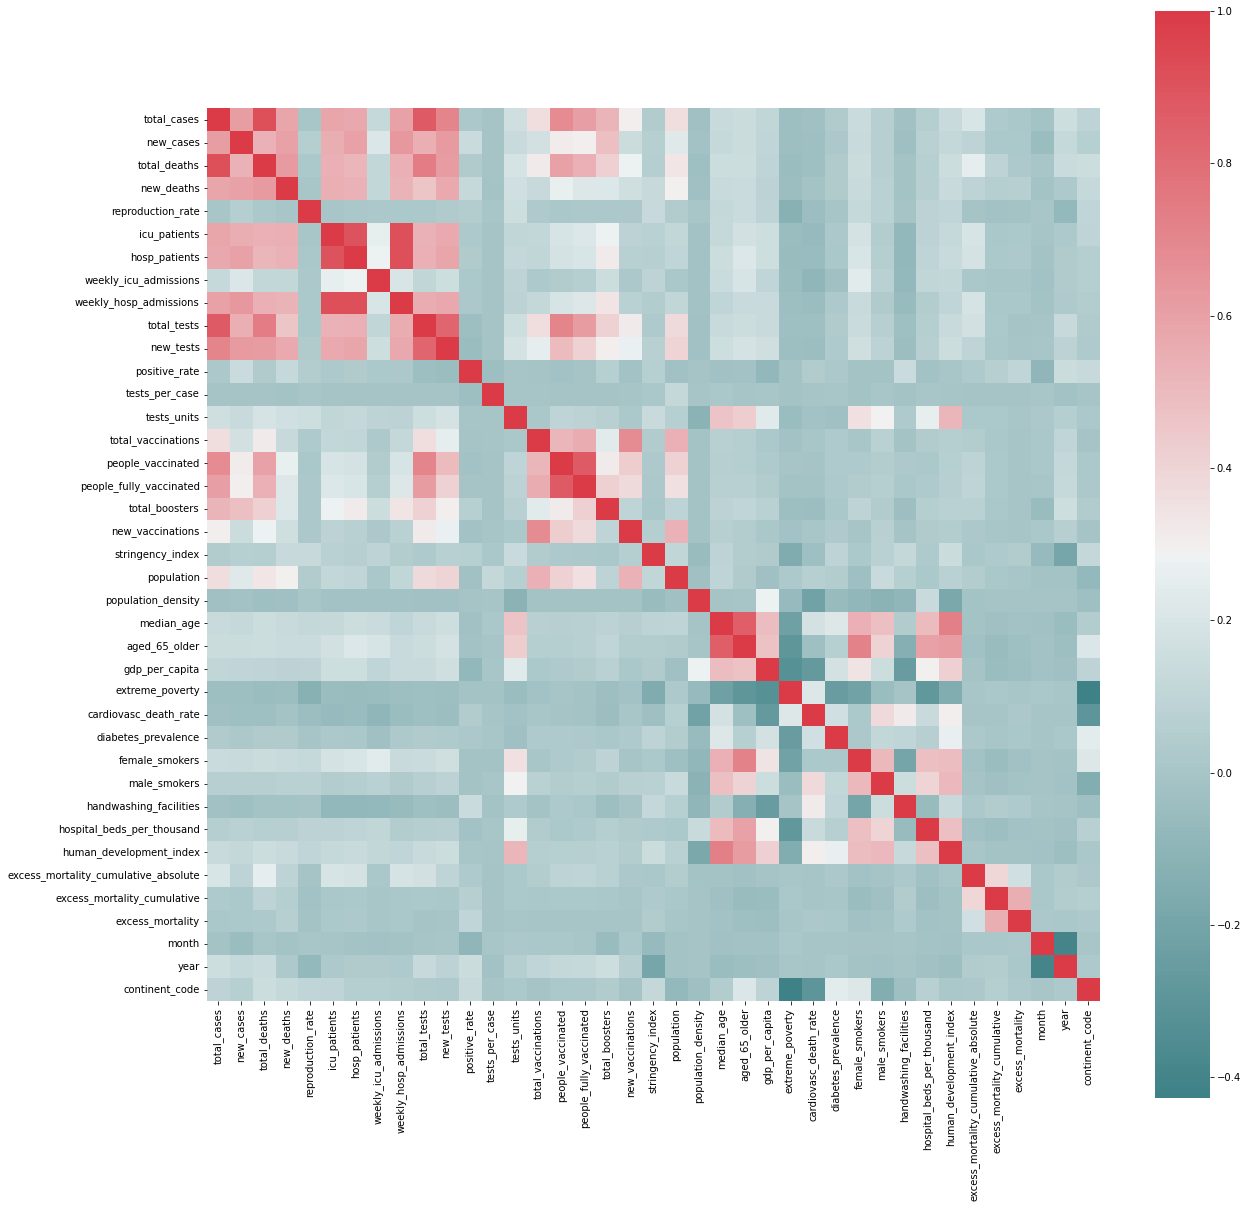

In [23]:
fi, axis = plt.subplots(figsize=(20, 20))
corr = clean_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

From the figure, there are correlation between each column of dataframe which is red is high correlation and blue is low correlation.

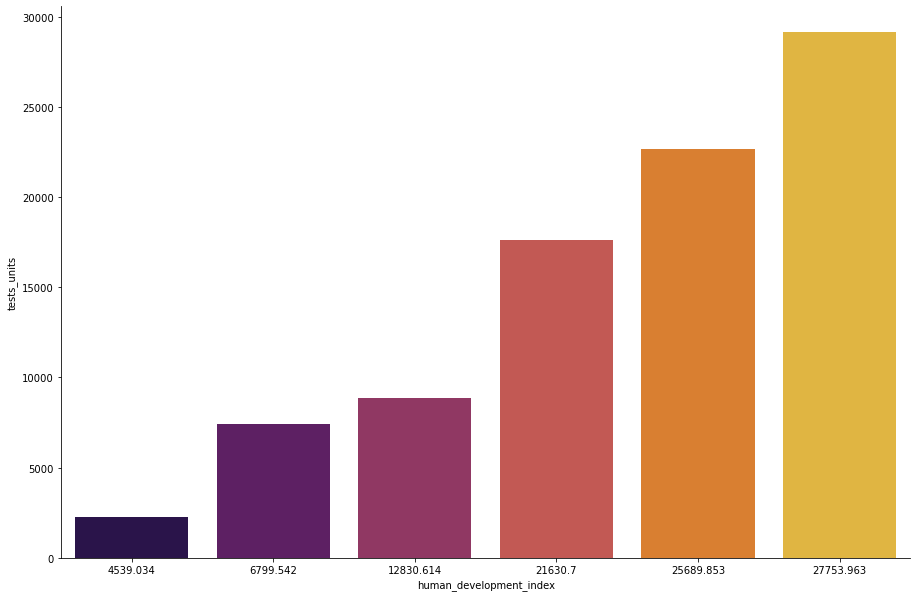

In [24]:
sns.catplot(x='human_development_index', 
            y='tests_units', kind='bar', palette="inferno", 
            data=clean_df.groupby('continent').agg('sum'))
plt.gcf().set_size_inches(15, 9)

The continent which has higher human development index will have more tests units.

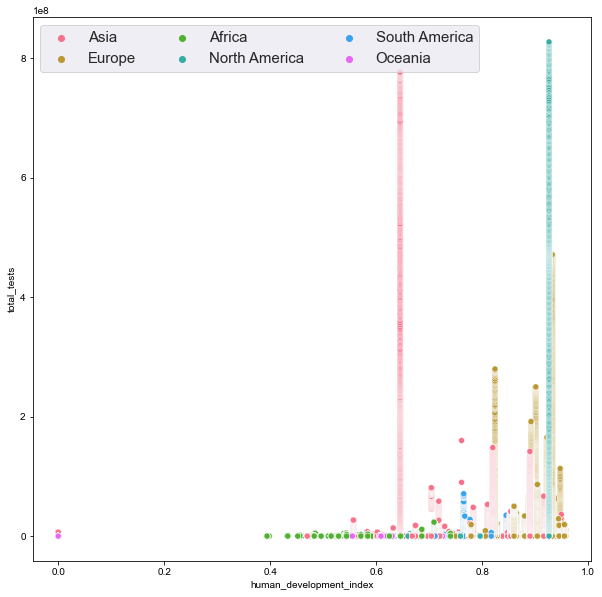

In [25]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
ax = sns.scatterplot(x='human_development_index', 
                     y='total_tests',
                     hue = 'continent',
                     palette="husl", 
                     data=clean_df)
plt.legend(fontsize=15,ncol=3)
plt.show()

The continent which has higher human development index will have more total tests. By the way, the number of total test also depend on the number of population of each continent.

Text(0.5, 1.0, '2022')

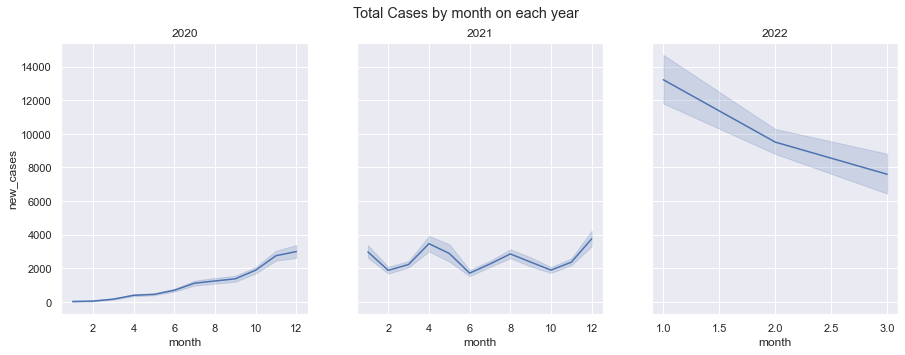

In [26]:
#Build the subplot to plot the new cases by month in each year
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Total Cases by month on each year')

# 2020
sns.lineplot(ax=axes[0], x= 'month', y='new_cases' , data = twozero)
axes[0].set_title("2020")

# 2021
sns.lineplot(ax=axes[1], x= 'month', y= 'new_cases', data = twoone)
axes[1].set_title('2021')

# 2022
sns.lineplot(ax=axes[2], x= 'month', y='new_cases' , data = twotwo)
axes[2].set_title('2022')

The total new cases is increasing every month in 2021, but the new cases in each month on 2021 is unstable because of the vaccination and the new types of covid-19. Late-2021 until the first month of 2022 is the range that highest new cases. In 2022 the total new cases in each month is decreasing as you can see on the right graph.

<AxesSubplot:xlabel='continent', ylabel='aged_65_older'>

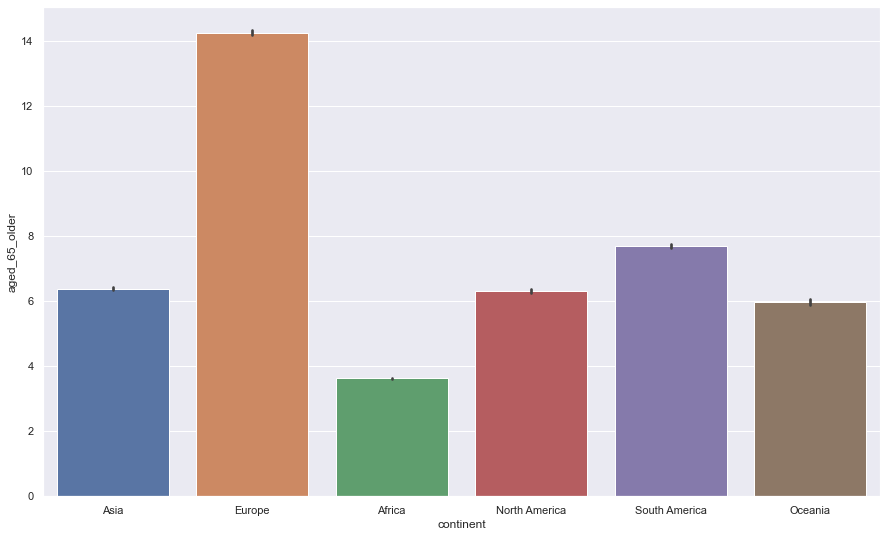

In [27]:
plt.gcf().set_size_inches(15, 9)
sns.barplot(x = 'continent', y = 'aged_65_older', data = clean_df)


The graph above show about the number of people who has age more than 65 in each continents. The result show that Europe is the continent who has the highest population with age more than 65 which is the group of people who could be in the critical condition if they are infected by covid-19. This result is relaed to the number of patinets in the hospital in each coontinent in the new graph below

[Text(0.5, 0, 'Continent'), Text(0, 0.5, 'Patients')]

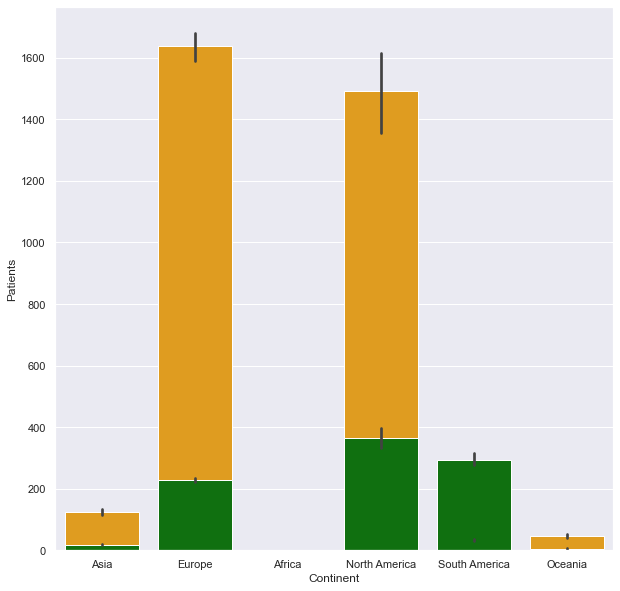

In [28]:
#Plot the graph that show about the patients in each continent
fig = plt.subplots(figsize=(10, 10))


fig = sns.barplot(x= 'continent', y = 'hosp_patients', data = clean_df , color = 'orange')
fig = sns.barplot(x= 'continent', y = 'icu_patients', data = clean_df , color = 'green')

fig.set(xlabel = 'Continent', ylabel = 'Patients')



The graph above show about the result of patients in the hospital, and ICU in each continents. The result is Europe is the continent that has highest patients in the hospital follow by North America, and Asia. However, North America is the continent that has highest pateints in ICU follow by South America , and Europe. This can conclude that countries in Europe can handle to the patients in the hospital better than North America and South America.